### Seasonal Decomposition
To model time series as having seperate components

### Components

- **Level** is the avereage value in the series. 
- **Trend($T_t$)** is the increasing or decreasing value in the series.
- **Seasonality($S_t$)** is the repeating short-term cycle in the series.
- **Noise($R_t$)** is the random variation in the series. 

### Two models to analyze the seasonality of a Time Series:
- Additive
- Multiplicative

### Additive model
The effects of the individual factors are differentiated and added to model the data.

$y(t) = Level + Trend + Seasonality + Noise$

The linear seasonality has the same amplitude and frequency. 

### Multiplicative model
Trend and seasonal components are multiplied and then added to the error components.

$y(t) = Level * Trend * Seasonality * Noise$

The multiplicative model has an increasing or decreasing amplitude and/or frequency over time.

In [9]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas_datareader.data as web
from datetime import date
import statsmodels.api as sm

In [4]:
# Acquire S&P 500 data

ticker = ["^GSPC"]

start_date = "2000-01-01"
end_date = date.today()

data = web.DataReader(ticker, data_source='yahoo', start=start_date, end=end_date)['Adj Close']

In [5]:
# Quick summarize the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5266 entries, 2000-01-03 to 2020-12-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   5266 non-null   float64
dtypes: float64(1)
memory usage: 82.3 KB


In [6]:
# Take a quick peek
data.tail()

Symbols,^GSPC
Date,
2020-11-30,3621.629883
2020-12-01,3662.449951
2020-12-02,3669.010010
2020-12-03,3666.719971
2020-12-04,3699.120117


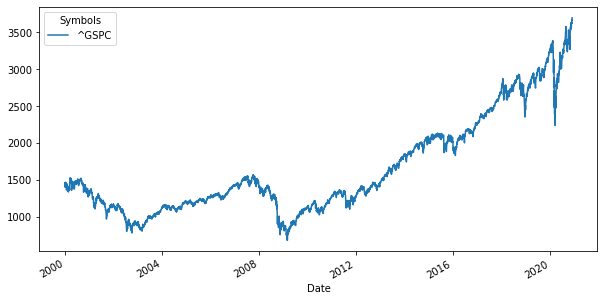

In [8]:
# Quick Visualize the data

data.plot(figsize=(10,5))
plt.show()

In [45]:
# Resample data monthly

y = data.resample("W").last()
y.head()

Symbols,^GSPC
Date,
2000-01-09,1441.469971
2000-01-16,1465.150024
2000-01-23,1441.359985
2000-01-30,1360.160034
2000-02-06,1424.369995


In [46]:
# Check to make sure there is no missing values
y.isnull().sum()

Symbols
^GSPC    0
dtype: int64

### Additive model

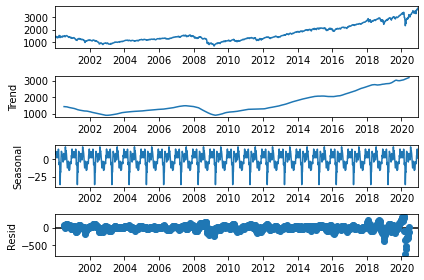

In [47]:
# Perform decomposition 

additive = sm.tsa.seasonal_decompose(y, model='additive')

# Plot the components returned from seasonal_decompose

additive.plot()
None # Added to avoid the duplicates

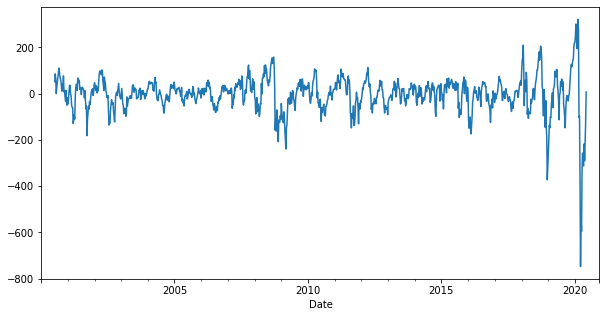

In [62]:
# Plot the residual

plt.figure(figsize=(10, 5))
additive.resid.plot()
plt.show()

### Multiplicative model

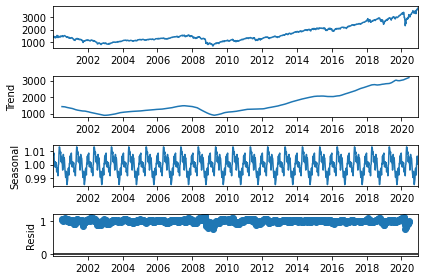

In [63]:
multiplicative = sm.tsa.seasonal_decompose(y, model='multiplicative')
multiplicative.plot()
None

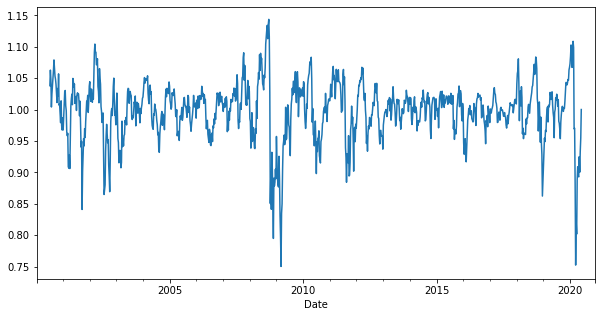

In [64]:
# Plot the residual

plt.figure(figsize=(10, 5))
multiplicative.resid.plot()
plt.show()